# Лабораторная работа 2 - Исследование алгоритмов классификации

## Библиотеки

Перед началом работы подключим необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
%matplotlib inline

## Оценка датасета

Выберем метку и проведём оценку сбалансированности классов

### Выбор атрибута на роль целевого класса (метки)

В результате оценки ранее использованного датасета мы пришли к выводу, что он <u>не сбалансирован</u>.

Возьмём следующий сбалансированный датасет: [Набор данных показателей здоровья при диабете (сбалансированный)](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv)

Это чистый набор данных, состоящий из 70 692 ответов на вопросы анкеты BRFSS2015 Центра по контролю и профилактике заболеваний. Он имеет равное соотношение 50 на 50 респондентов без диабета и с предиабетом или диабетом.

Этот набор данных содержит 21 признаковую переменную и одну целевую.

In [2]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv.zip')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


В качестве целевой переменной возьмём __Diabetes_binary__. Этот признак имеет 2 класса. 0 означает отсутствие диабета, а 1 - предиабет или диабет.

### Оценка сбалансированности классов

Теперь проверим на сбалансированность.

In [3]:
class_counts = df['Diabetes_binary'].value_counts()
print(class_counts)

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


Класс сбалансирован, как и указано в описании.

## Обучение модели классификации и оценка результатов

Применим следующие алгоритмы классификации:
1. kNN
2. Дерево решений

### 1. kNN

Мы используем алгоритм k-Nearest Neighbors (kNN) для классификации нашего датасета на основе его ближайших соседей в пространстве признаков.

_Стандартизируем набор данных:_

In [4]:
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
scaled_data = pd.DataFrame(scaled_features, columns = df.columns)

_Разделим набор данных на обучающий и тестовый (размер тестового набора составит 30% от изначального):_

In [5]:
x = scaled_data
y = df['Diabetes_binary']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3, random_state = 25)

_Определим наилучшее значение параметра n:_

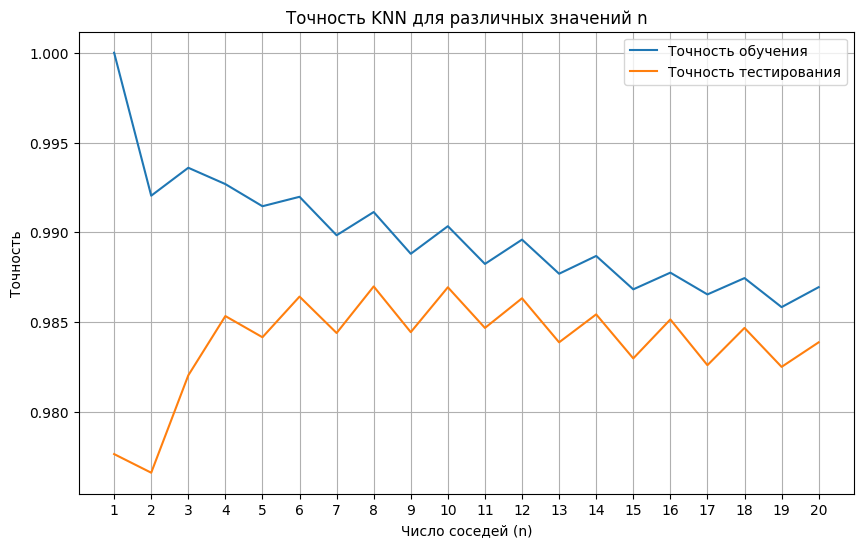

In [6]:
neighbors = range(1, 21)
train_accuracy = []
test_accuracy = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_training_data, y_training_data)
    
    train_accuracy.append(knn.score(x_training_data, y_training_data))
    test_accuracy.append(knn.score(x_test_data, y_test_data))


plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label='Точность обучения')
plt.plot(neighbors, test_accuracy, label='Точность тестирования')
plt.xlabel('Число соседей (n)')
plt.ylabel('Точность')
plt.title('Точность KNN для различных значений n')
plt.legend()
plt.xticks(neighbors)
plt.grid(True)
plt.show()

Из графика видно, что наилучшим значением параметра n для KNN является 8, так как именно при этом значении достигается самая высокая точность на тестовой выборке.

_Обучим модель К-ближайших соседей:_

In [7]:
%%capture
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(x_training_data, y_training_data)

_Выполним прогнозирование:_

In [8]:
predictions = model.predict(x_test_data)
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10671
         1.0       0.99      0.99      0.99     10537

    accuracy                           0.99     21208
   macro avg       0.99      0.99      0.99     21208
weighted avg       0.99      0.99      0.99     21208



_Вычислим матрицу ошибок:_

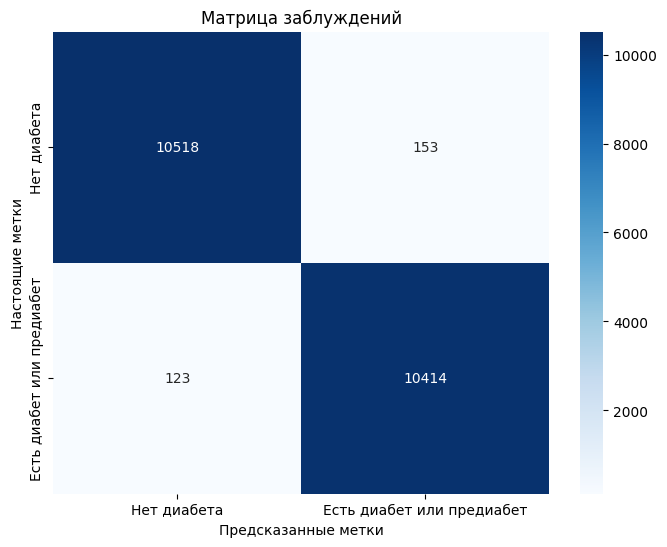

In [9]:
y_pred = model.predict(x_test_data)
cm = confusion_matrix(y_test_data, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Нет диабета', 'Есть диабет или предиабет'], 
            yticklabels=['Нет диабета', 'Есть диабет или предиабет'])
plt.xlabel('Предсказанные метки')
plt.ylabel('Настоящие метки')
plt.title('Матрица заблуждений')
plt.show()

#### Вывод:

Исходя из данных матрицы ошибок, алгоритм демонстрирует высокую точность классификации. Сочетание высокого количества правильных предсказаний для обоих классов (10518 и 10414) при сравнительно небольшом числе ошибок (153 и 123) указывает на хорошую способность модели точно определять наличие и отсутствие диабета.
Для повышения точности алгоритма можно попробовать улучшить признаковое описание данных, использовать более сложные модели или настраивать параметры текущей модели для достижения лучшей производительности.

_Оценим производительность модели с помощью ROC-кривой:_

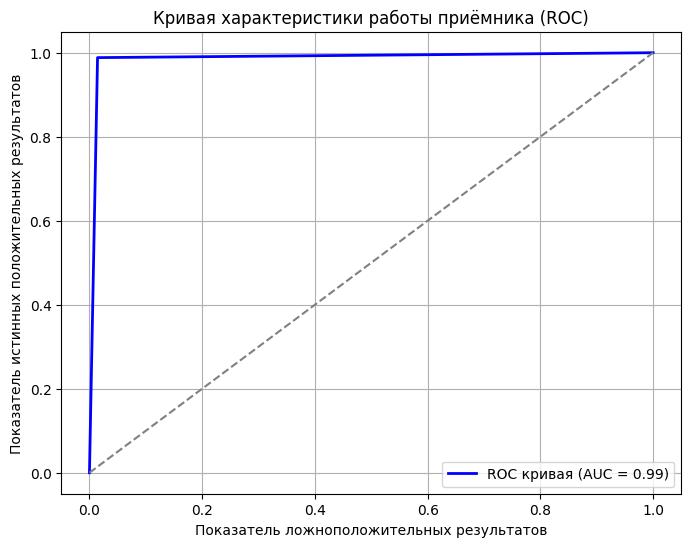

In [10]:
fpr, tpr, thresholds = roc_curve(y_test_data, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC кривая (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Показатель ложноположительных результатов')
plt.ylabel('Показатель истинных положительных результатов')
plt.title('Кривая характеристики работы приёмника (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Вывод:

Полученные результаты указывают на высокую эффективность модели: кривая, хоть и угловатая, но очень близка к идеальному значению, что подтверждается высоким AUC (площадью под кривой) в 0.99. Угловатость кривой связана с тем, что модель делает жёсткие предсказания, не предоставляя вероятностные оценки, что ограничивает её способность формировать плавные кривые ROC.

### 2. Дерево решений

_Разделим набор данных на обучающий и тестовый (размер тестового набора составит 30% от изначального):_

In [11]:
x = scaled_data
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 25)

_Обучим модель алгоритма дерева решений:_

In [12]:
%%capture
classifier = DecisionTreeClassifier() 
classifier.fit(X_train, y_train)

_Выполним прогнозирование:_

In [13]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10671
         1.0       1.00      1.00      1.00     10537

    accuracy                           1.00     21208
   macro avg       1.00      1.00      1.00     21208
weighted avg       1.00      1.00      1.00     21208



_Вычислим матрицу ошибок:_

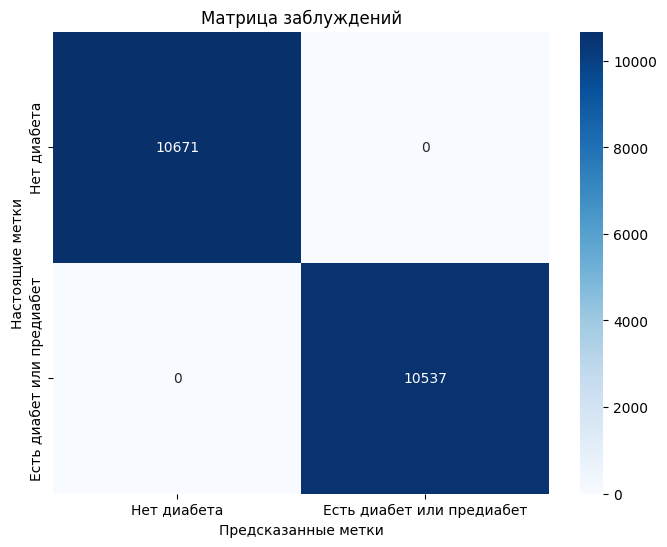

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Нет диабета', 'Есть диабет или предиабет'], 
            yticklabels=['Нет диабета', 'Есть диабет или предиабет'])
plt.xlabel('Предсказанные метки')
plt.ylabel('Настоящие метки')
plt.title('Матрица заблуждений')
plt.show()

#### Вывод:

Полученные результаты показывают идеальную точность классификации алгоритма дерева решений, где нет ложно-положительных и ложно-отрицательных предсказаний. Учитывая эту идеальную производительность, возможно, дальнейшее улучшение алгоритма не является приоритетной задачей.

_Оценим производительность модели с помощью ROC-кривой:_

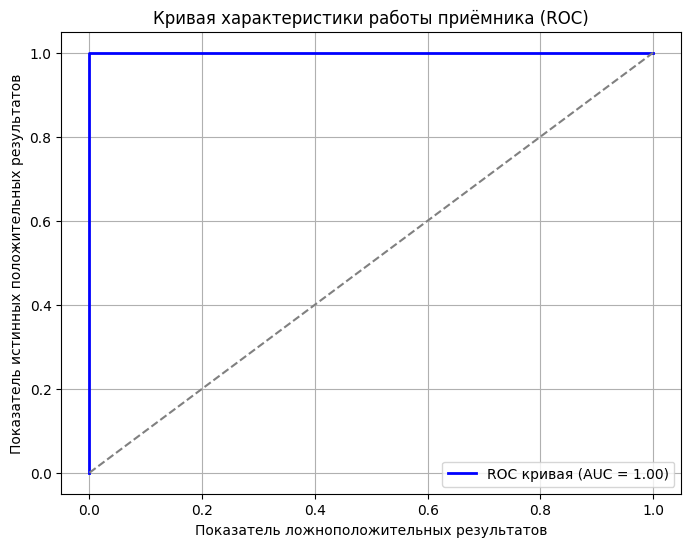

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC кривая (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Показатель ложноположительных результатов')
plt.ylabel('Показатель истинных положительных результатов')
plt.title('Кривая характеристики работы приёмника (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Вывод:

ROC-кривая находится в идеальном положении, что указывает на идеальную производительность алгоритма классификации дерева решений.

## 2. Сравним полученные результаты с помощью различных метрик оценки качества: Accuracy, Presicion, Recall, F-measure, ROC

|                   | Accuracy   | Precision  | Recall     | F-measure  | ROC        |
| ----------------- | ---------- | ---------- | ---------- | ---------- | ---------- 
| __kNN__           | 0.99 | 0.99 | 0.99 | 0.99 | auc = 0.99 |
| __Decision Tree__ | 1.00 | 1.00 | 1.00 | 1.00 | auc = 1.00 |наками.наками.наками.у признакамию.``
  |


Где:
* Accuracy (Точность) представляет собой процент правильно классифицированных данных. В нашем исследовании, точность для метода KNN составляет 99%, а для Дерева решений - 100%.
* Precision (Точность) представляет собой отношение правильно классифицированных объектов к числу объектов, отнесённых к классу "положительный".
* Recall (Полнота) представляет собой отношение правильно классифицированных объектов, принадлежащих классу "положительный", к общему числу объектов этого класса.
* F1-мера представляет собой объединение показателей точности (Precision) и полноты (Recall).
* ROC-кривая (Receiver Operating Characteristic) иллюстрирует связь между долей правильно классифицированных положительных образцов (TPR) и долей ложно классифицированных отрицательных образцов (FPR).

После анализа результатов сравнения алгоритмов KNN и Дерева решений при использовании различных метрик качества, таких как Accuracy, Precision, Recall, F1-score и ROC-кривые, обнаружено, что оба метода успешно решают задачу классификации. Тем не менее, Дерево решений продемонстрировало незначительно более высокую эффективность, что, возможно, связано с его способностью учитывать нелинейные зависимости между признаками.

## 3. Объясним полученные результаты

Учитывая использование сбалансированного датасета, полученные высокие показатели метрик для обеих моделей, kNN и Дерево решений, говорят о их способности обрабатывать данные равномерно для каждого класса. Это означает, что модели не предпочитают один класс над другим, что часто случается при работе с несбалансированными данными. Такие высокие результаты подтверждают, что обе модели успешно справляются с задачей классификации на сбалансированном наборе данных.

Полученные результаты могут изменяться в зависимости от выбора набора данных и гиперпараметров, использованных в каждом алгоритме. Для получения более точных результатов можно провести дополнительные эксперименты, изменяя параметры и используя различные наборы данных.